In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn import linear_model
import pickle
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from numpy import cov
%matplotlib inline

In [2]:
with open('./Q2_data/X_train.pkl', 'rb') as f:
    train_X = pickle.load(f)

In [3]:
with open('./Q2_data/Y_train.pkl', 'rb') as f:
    train_Y = pickle.load(f)

In [4]:
with open('./Q2_data/X_test.pkl', 'rb') as f:
    test_X = pickle.load(f)

In [5]:
with open('./Q2_data/Fx_test.pkl', 'rb') as f:
    test_Y = pickle.load(f)

In [6]:
print(train_X.shape)
print(train_Y.shape)

(20, 400)
(20, 400)


In [7]:
print(train_X)

[[ 39.18236666  -7.08833508 -39.80170787 ... -39.91722818 -32.1922517
  -34.59690847]
 [  3.65397031 -23.00911309  30.09446289 ...  36.35403106   8.9512678
   22.57524484]
 [ 33.67587032 -19.08946213  18.09819893 ...  41.5257231   44.8411174
  -17.78096981]
 ...
 [ 44.49194225 -45.57639101  46.74878519 ... -26.08145893 -42.46265146
    2.37850948]
 [-10.09926802  30.83303774   5.34475387 ...  -2.19280553 -11.05173998
  -25.4291418 ]
 [ 46.30665334  11.60395221  -2.90249351 ...  39.35145933  12.8210855
  -28.09216372]]


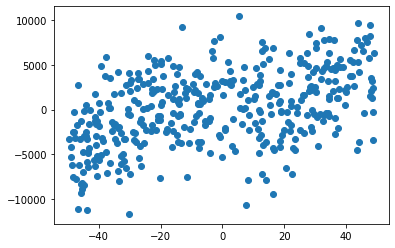

In [8]:
plt.scatter(train_X[0],train_Y[0])

[1069773.88601767 1080490.1293432   159463.46966327  223143.05645933
  285727.67454607  327112.08437864  367846.260619    414436.08992972
  469947.86540906]


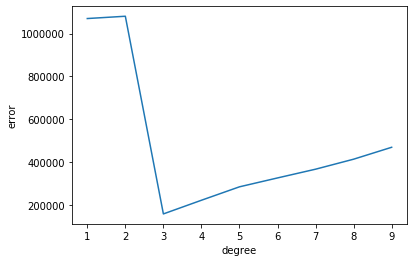

[999228.39687192 954619.27379442   9389.73011679  10907.34813407
   9339.19429133  10248.58594115  10335.27586165  10149.41924394
  10815.48703657]


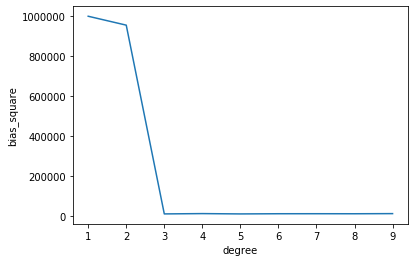

[ 70545.48914575 125870.85554877 150073.73954648 212235.70832526
 276388.48025474 316863.49843749 357510.98475735 404286.67068579
 459132.37837249]


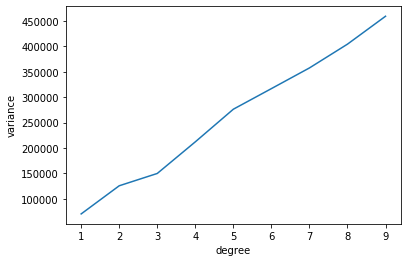

[ 0.00000000e+00  0.00000000e+00  2.91038305e-11  2.91038305e-11
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.82076609e-11
 -1.16415322e-10]


In [9]:
errors = list()
bias_square = list()
variance = list()
for currDeg in range(1,10):
    predict = list()
    diffs = list()
    error = list()
    poly = PolynomialFeatures(degree = currDeg)
    curr_test_X = poly.fit_transform(test_X.reshape(-1,1))
    # loop over all the 10 partitions to create 10 different models
    for chunk in range(20):
        curr_train_X = poly.fit_transform(train_X[chunk].reshape(-1,1))
        # get the regressor now
        regressor = linear_model.LinearRegression()
        regressor.fit(curr_train_X,train_Y[chunk])
        
        # now test it
        prediction = regressor.predict(curr_test_X)
        
        # fill the lists
        diffs.append(prediction - test_Y)
        predict.append(prediction)
        error.append(mean_squared_error(test_Y,prediction))
        
        # calculate bias = E(f' - f) and variance = E[(f' - E[f'])^2] for each point accross models
    errors.append(np.mean(error))
    diffs = np.array(diffs)
    diffs = np.transpose(diffs)
    predict = np.array(predict)
    curr_bias = np.mean(np.mean(diffs,1)**2)

    bias_square.append(curr_bias)
    variance.append(np.mean((predict - np.mean(predict,0))**2))

errors = np.array(errors)
bias_square = np.array(bias_square)
variance = np.array(variance)
plt.plot(range(1,10),errors)
plt.xlabel('degree')
plt.ylabel('error')
print(errors)
plt.show()
plt.plot(range(1,10),bias_square)
plt.xlabel('degree')
plt.ylabel('bias_square')
print(bias_square)
plt.show()
plt.plot(range(1,10),variance)
print(variance)
plt.xlabel('degree')
plt.ylabel('variance')
plt.show()

print(errors - (bias_square+variance))